In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
import numpy as np
from sklearn.metrics import classification_report
from mlxtend.evaluate import confusion_matrix

In [2]:
# Loading and displaying the dataset
data_frame = pd.read_csv("/content/advertising.csv")
data_frame.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
data_frame.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [4]:
data_frame.shape

(1000, 10)

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


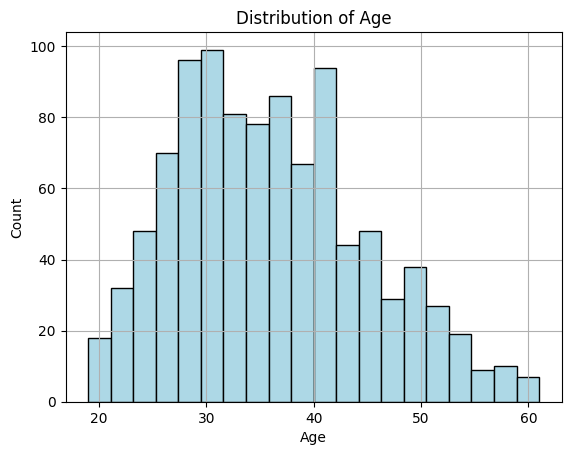

In [6]:
# Histogram of Age
plt.hist(data_frame['Age'], bins=20, edgecolor='black', color='lightblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
if not os.path.exists('fig'):
    os.makedirs('fig')
plt.savefig('fig/hage.png')
plt.show()

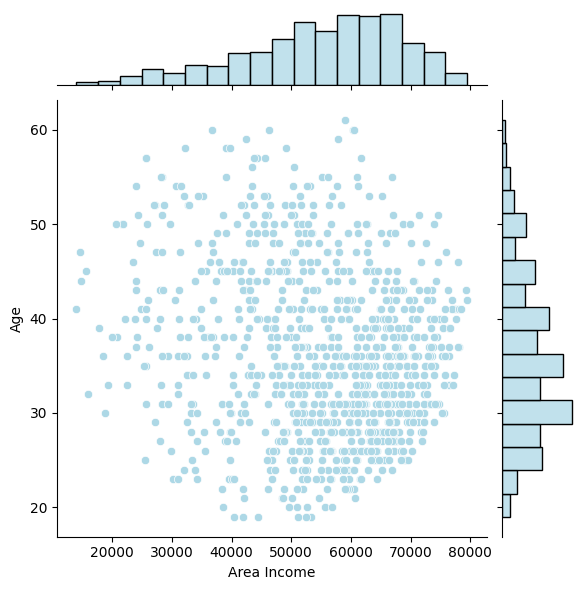

In [7]:
 # Scatter plot for Area Income vs Age
sns.jointplot(x='Area Income', y='Age', data=data_frame, kind='scatter', color='lightblue')
plt.savefig('fig/scatter_area_income.png')
plt.show()

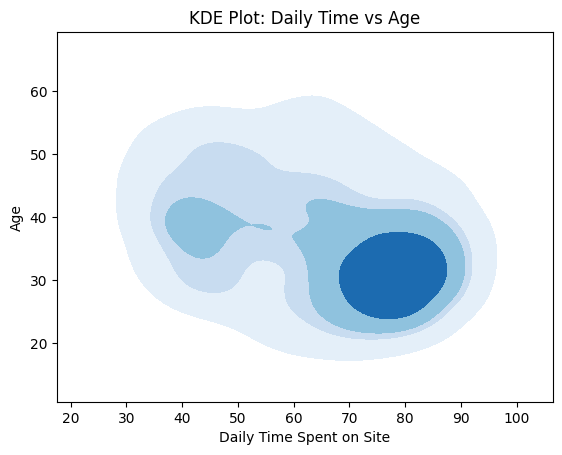

In [8]:
# Kernel Density Estimation (KDE) plot
sns.kdeplot(data=data_frame, x='Daily Time Spent on Site', y='Age', fill=True, cmap='Blues', levels=5)
plt.title('KDE Plot: Daily Time vs Age')
plt.savefig('fig/kde_plot.png')
plt.show()

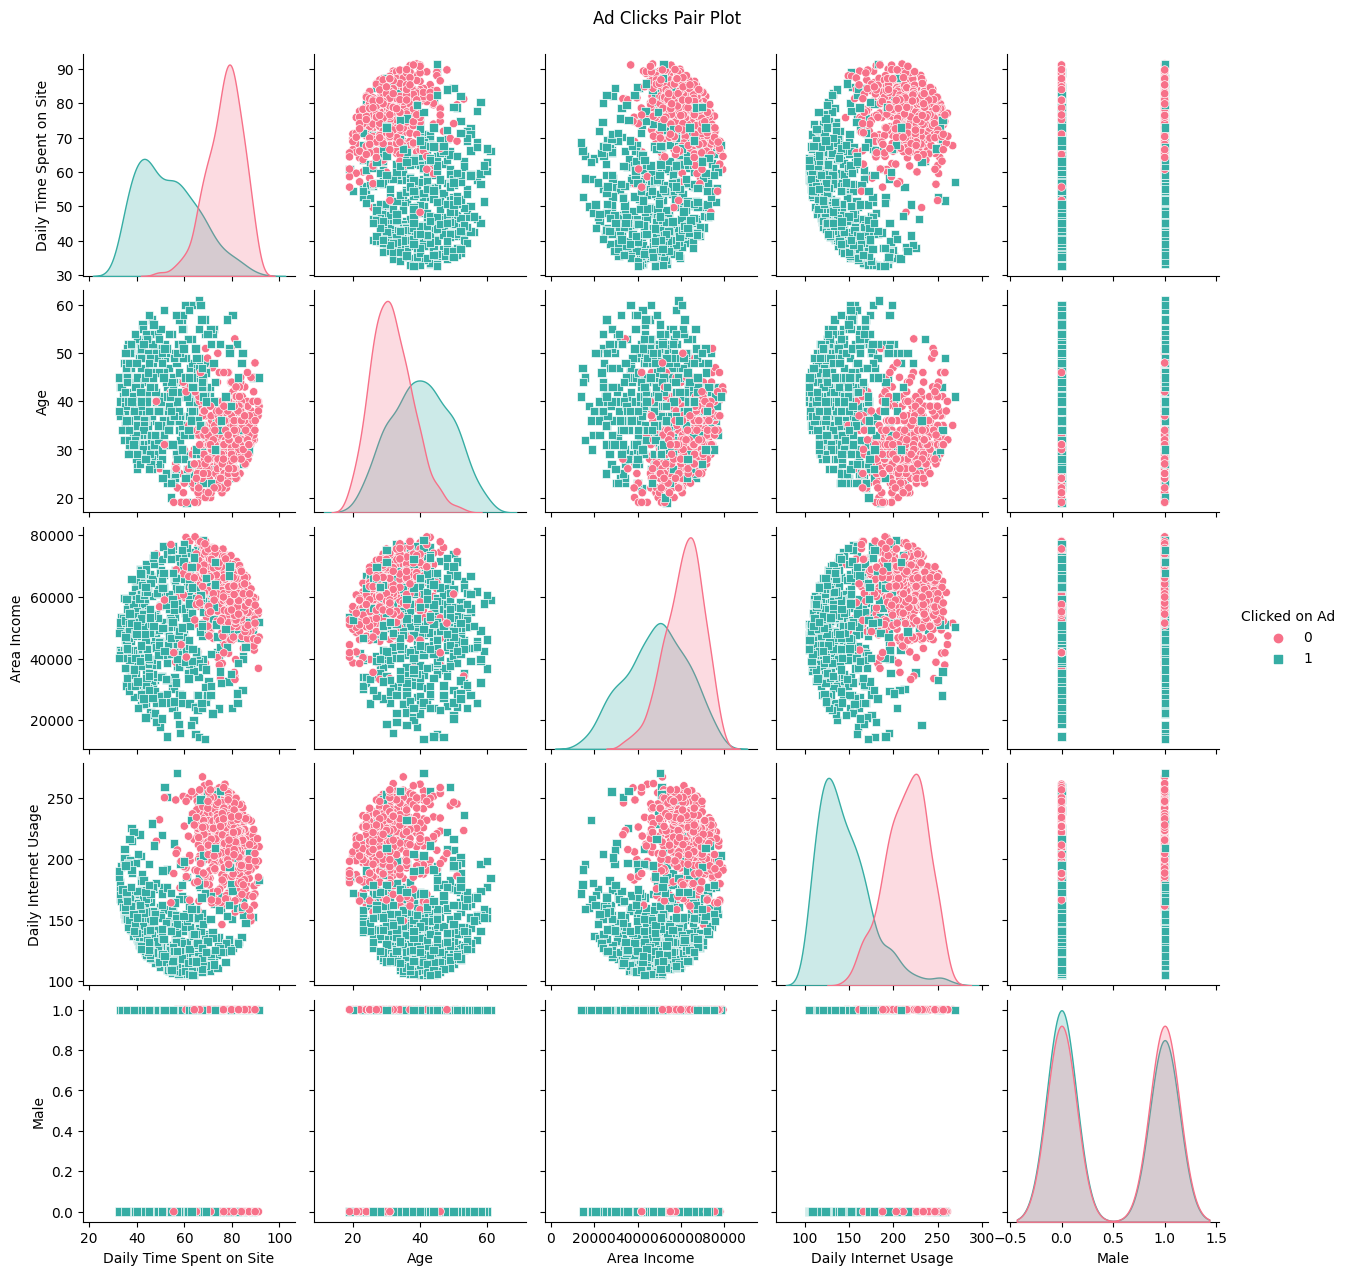

In [9]:
# Pair plot
sns.pairplot(data_frame, hue='Clicked on Ad', palette='husl', markers=["o", "s"])
plt.suptitle('Ad Clicks Pair Plot', y=1.02)
plt.savefig('fig/pair_plot.png')
plt.show()

In [10]:
# Preprocessing
data_frame.drop(columns=['City', 'Country', 'Timestamp', 'Ad Topic Line'], inplace=True)
features = data_frame.drop('Clicked on Ad', axis=1)
target = data_frame['Clicked on Ad']
num_features = features.select_dtypes(include=['float64', 'int64']).columns

In [11]:
# Normalizing data
normalizer = StandardScaler()
features[num_features] = normalizer.fit_transform(features[num_features])

In [12]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=101)

In [13]:
# Logistic Regression using sklearn
sklearn_lr_model = SklearnLogisticRegression()
sklearn_lr_model.fit(X_train, y_train)
predictions = sklearn_lr_model.predict(X_test)
sklearn_accuracy = np.mean(predictions == y_test)
print(sklearn_accuracy)

0.9766666666666667


In [14]:
class CustomLogisticRegression:
    # Custom Logistic Regression implementation
    def __init__(self, lr=0.01, iterations=1000):
        self.lr = lr
        self.iterations = iterations
        self.weights = None
        self.intercept = None

    @staticmethod
    def _sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def _initialize_weights(self, feature_count):
        self.weights = np.zeros(feature_count)
        self.intercept = 0

    def fit(self, X, y):
        m = X.shape[0]
        self._initialize_weights(X.shape[1])

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.intercept
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / m) * np.dot(X.T, (y_predicted - y))
            db = (1 / m) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.intercept -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.intercept
        y_predicted = self._sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

In [15]:
# Using custom Logistic Regression
custom_model = CustomLogisticRegression(lr=0.001, iterations=10000)
custom_model.fit(X_train.to_numpy(), y_train.to_numpy())
custom_predictions = custom_model.predict(X_test.to_numpy())

custom_accuracy = np.mean(custom_predictions == y_test.to_numpy())
print("Custom Model Accuracy:", custom_accuracy)

Custom Model Accuracy: 0.9766666666666667


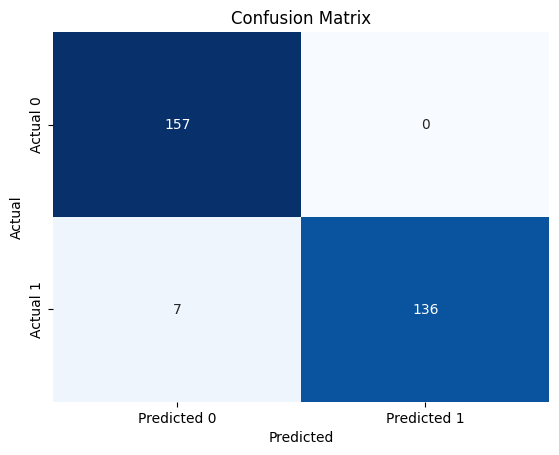

In [16]:
# Confusion Matrix and Classification Report
conf_mat = confusion_matrix(y_test, custom_predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('fig/confusion_matrix.png')
plt.show()

In [18]:
report = classification_report(y_test, custom_predictions)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       157
           1       1.00      0.95      0.97       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

